# Predictive Analysis

Mengimpor library yang diperlukan untuk proyek ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## Load Dataset

Loading Dataset.

In [2]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


## Exploratory Data Analysis

Mengecek informasi pada data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


Mengecek duplikasi data.

In [4]:
df.duplicated().sum()

np.int64(0)

Memastikan bahwa tidak ada missing value.

In [5]:
df.isna().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Menghapus kolom id, karena tidak diperlukan.

In [6]:
df.drop('Id', axis=1, inplace=True)

Statistika deskriptif.

In [7]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


Membuat Box-plot untuk untuk mengetahui outlier pada data.

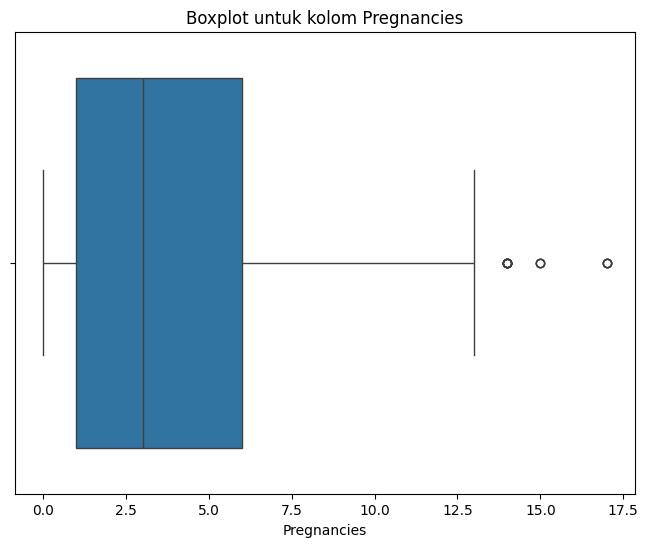

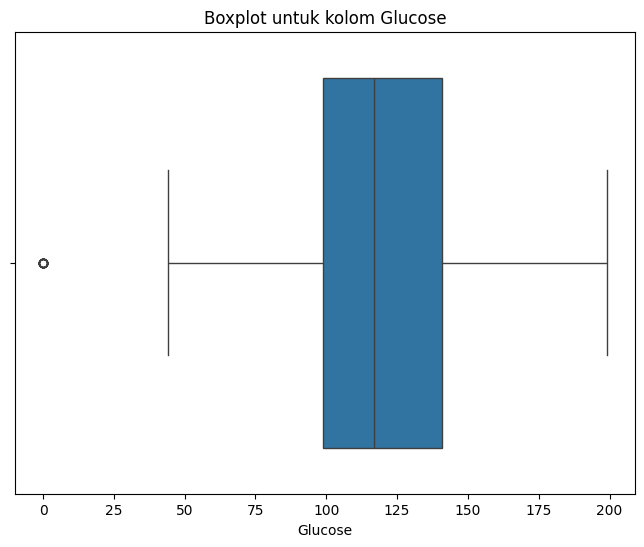

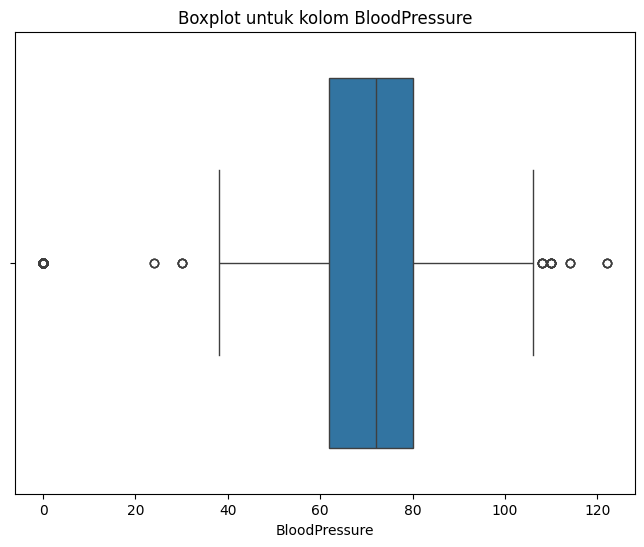

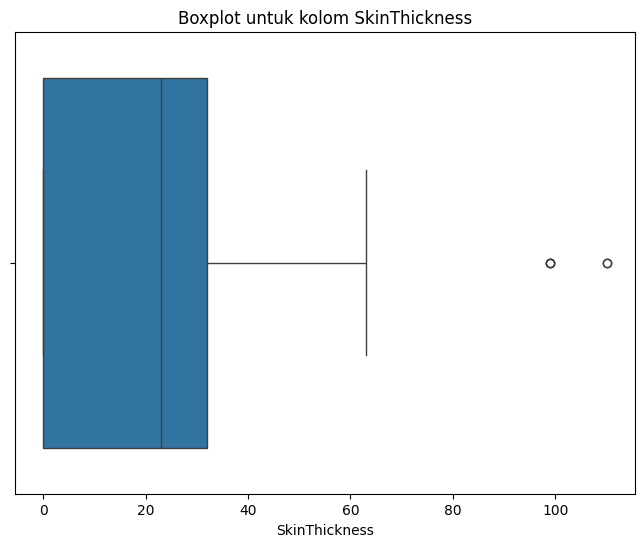

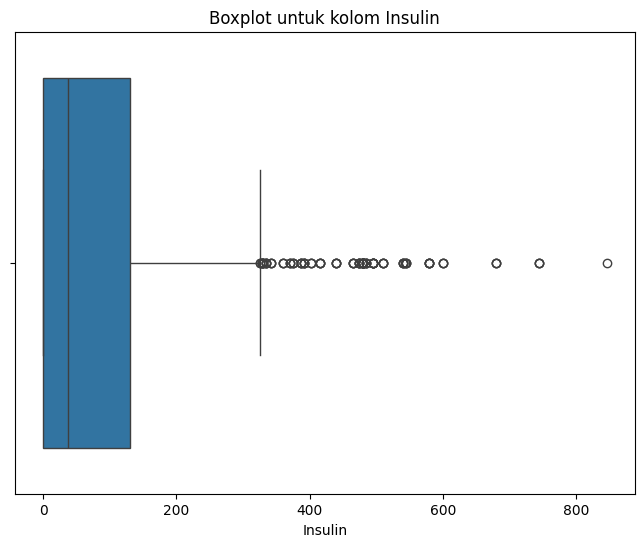

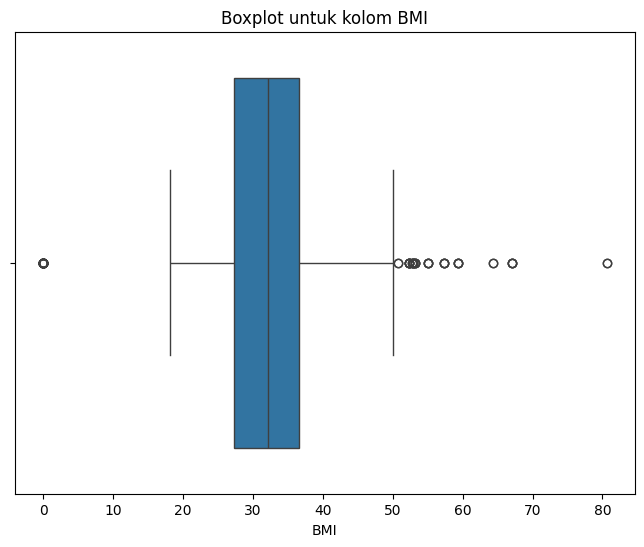

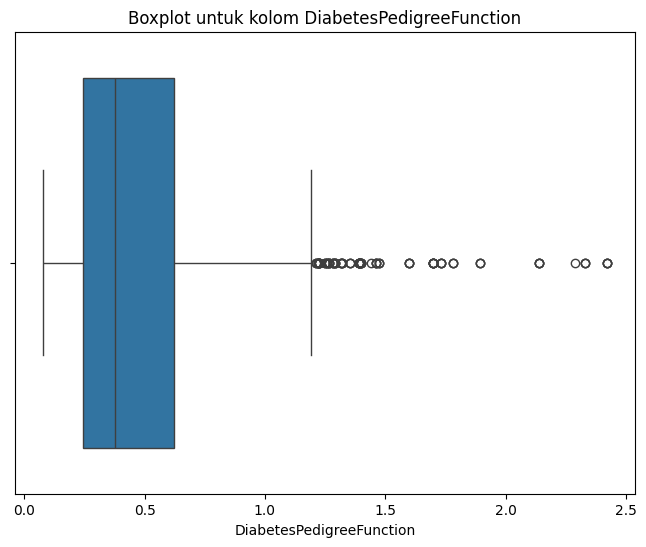

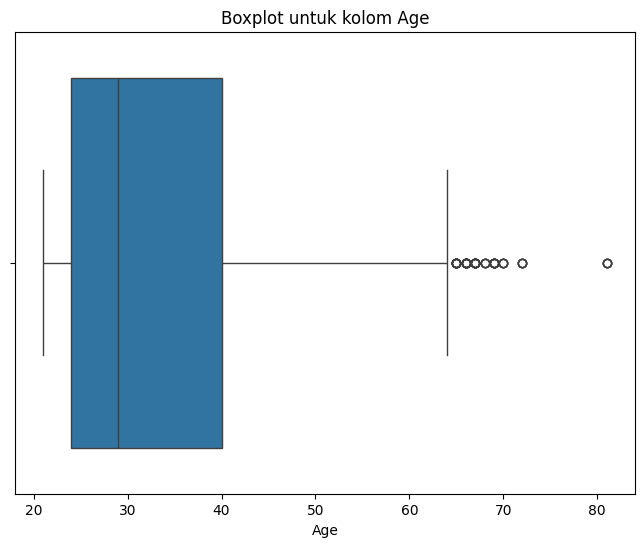

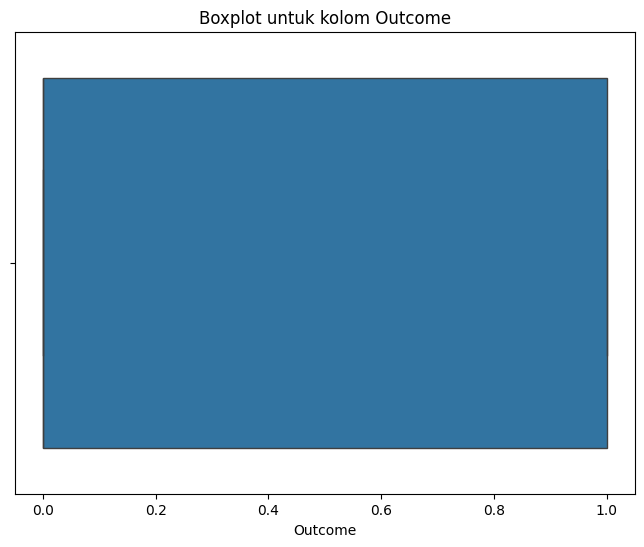

In [8]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot untuk kolom {column}')
    plt.show()

Menghapus outlier dengan menggunakan metode IQR.

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Menghapus baris yang mengandung outlier
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2299 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2299 non-null   int64  
 1   Glucose                   2299 non-null   int64  
 2   BloodPressure             2299 non-null   int64  
 3   SkinThickness             2299 non-null   int64  
 4   Insulin                   2299 non-null   int64  
 5   BMI                       2299 non-null   float64
 6   DiabetesPedigreeFunction  2299 non-null   float64
 7   Age                       2299 non-null   int64  
 8   Outcome                   2299 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 179.6 KB


Menampilkan distribusi fitur dengan histogram.

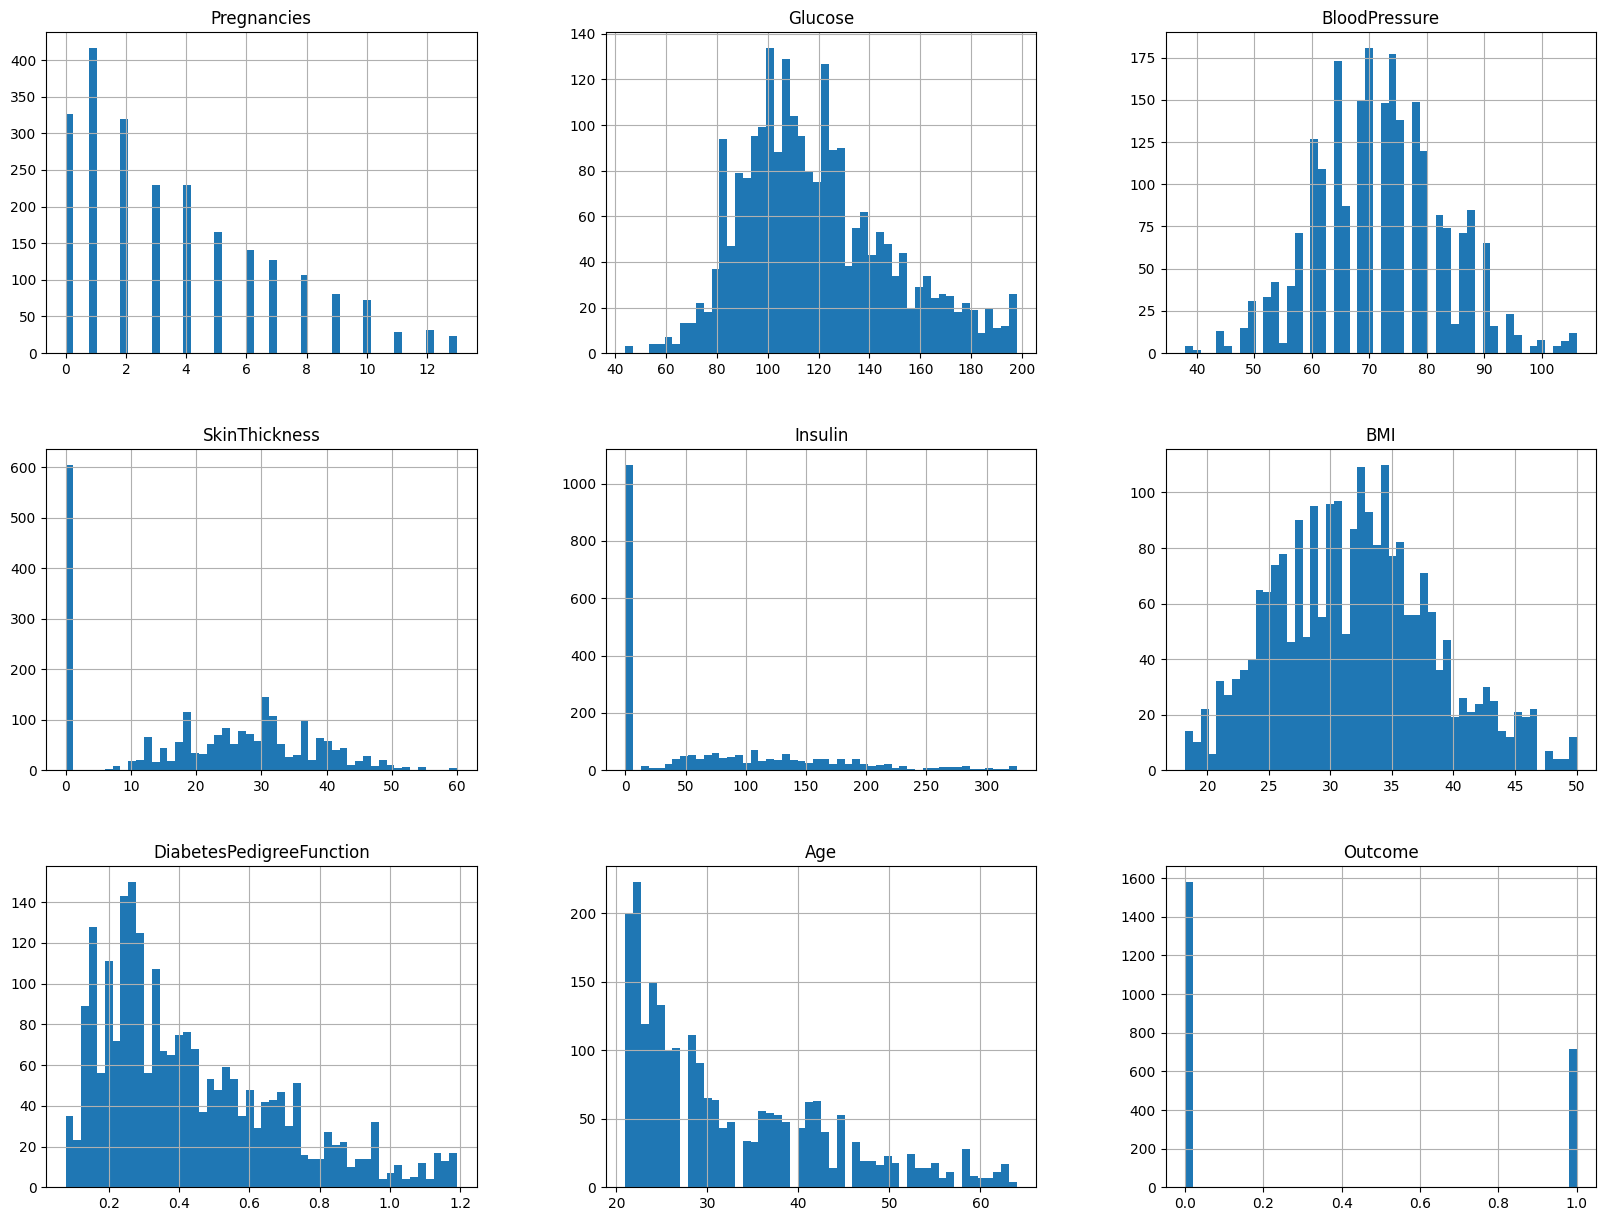

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Menampilkan matriks korelasi.

Text(0.5, 1.0, 'Correlation Matrix')

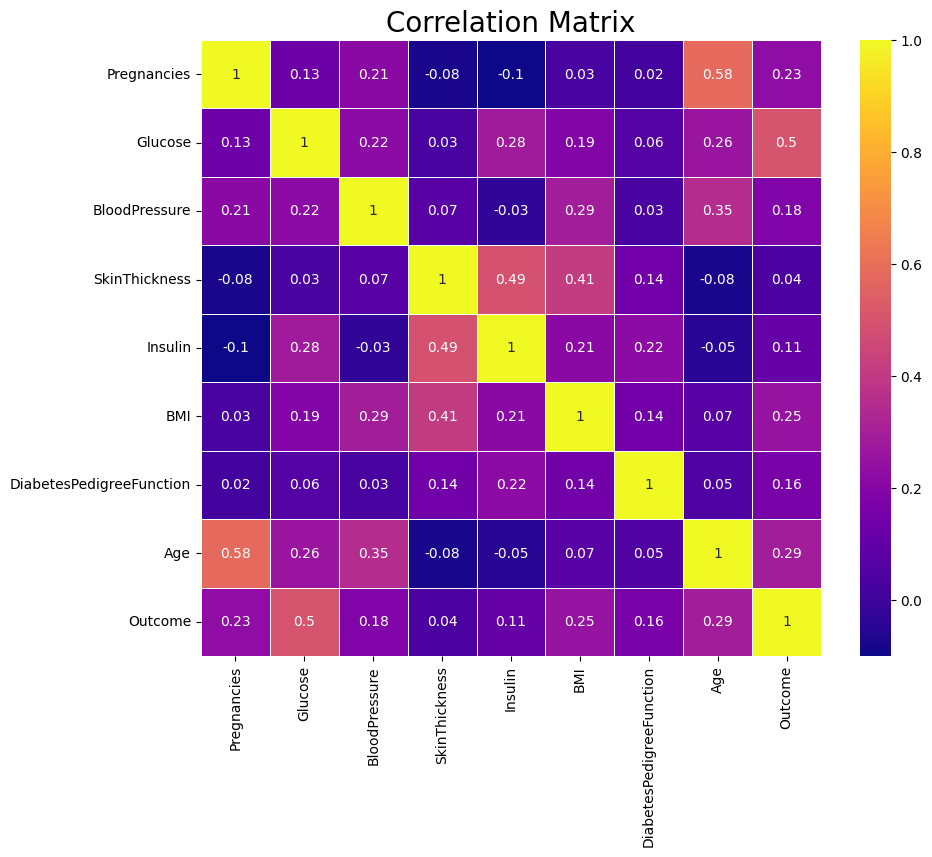

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title("Correlation Matrix", size=20)

## Modeling

### Splitting Data

Splitting data menjadi 70% | 30%

In [12]:
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [13]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2299
Total # of sample in train dataset: 1609
Total # of sample in test dataset: 690


### Standarisasi

Melakukan standarisasi pada data training dan data testing.

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.238962,-0.545233,-0.000055,0.592051,1.042290,-0.687972,1.192037,-0.507846
1,-0.238962,-0.268848,-1.247339,0.657990,-0.283961,-0.391709,0.000560,-0.971541
2,-0.862122,-0.096108,0.534495,0.526113,1.386133,0.637414,0.262685,-0.693324
3,-0.238962,2.495001,-0.356422,-0.397023,0.772128,-0.173410,-0.519718,0.141328
4,-0.862122,-0.268848,1.247228,-0.133270,-0.824286,-0.298152,-1.139286,-0.878802
...,...,...,...,...,...,...,...,...
1604,0.072618,1.113076,1.603595,1.119558,-0.824286,-0.360524,-0.539576,0.326806
1605,-0.862122,0.594854,0.178128,1.910817,1.680856,0.840120,-0.122559,-0.786063
1606,-0.862122,-0.096108,-0.178239,0.460175,-0.824286,-0.719157,-0.897019,-1.064280
1607,-0.550542,0.076633,-0.178239,0.723928,0.342324,1.105197,1.811605,-0.878802


Standarisasi.

In [15]:
X_test = scaler.transform(X_test)

Menampilkan hasil standarisasi.

In [16]:
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.695778,0.214825,0.534495,0.657990,-0.824286,-0.687972,0.536725,1.532414
1,1.007358,1.458557,1.247228,-1.386097,-0.824286,-0.251374,-1.051911,1.346936
2,-1.173702,0.560306,1.959962,1.647064,0.956329,1.339089,-0.579292,-0.600585
3,-1.173702,-0.614329,0.356311,-1.386097,-0.824286,0.575043,-0.920849,-0.600585
4,-0.550542,-0.648878,-0.178239,2.042694,-0.124320,1.323496,0.981543,-0.693324
...,...,...,...,...,...,...,...,...
685,-0.550542,0.145729,-2.138256,0.723928,1.201932,1.572980,0.358003,-0.600585
686,-0.550542,-0.648878,-1.603706,0.460175,0.465125,0.902491,0.270628,-0.786063
687,-1.173702,2.391356,0.890862,-0.462961,1.447534,-0.001890,1.001401,-0.971541
688,0.072618,0.802143,1.247228,-1.386097,-0.824286,1.869243,0.854452,-0.971541


Membuat dataframe untuk menyimpan hasil training dan testing (MSE).

In [17]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LinearRegression', 'RandomForest', 'KNN'])

Model Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=lr.predict(X_train), y_true=y_train)

Random Forest

In [19]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)

KNN

In [20]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Evaluasi Model

Hasil evaluasi model dengan menggunakan metrik MSE.

In [21]:
# Dataframe untuk hasil evaluasi
mse = pd.DataFrame(columns=['train', 'test'], index=['Linear Regression','Random Forest', 'KNN'])

# Algoritma yang digunakan
model_dict = {'Linear Regression':lr, 'Random Forest': rf, 'KNN': knn}

# Menghitung MSE model train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
Linear Regression,0.000145,0.000144
Random Forest,0.000002,0.000009
KNN,0.000004,0.000022


Plot nilai MSE setiap model.

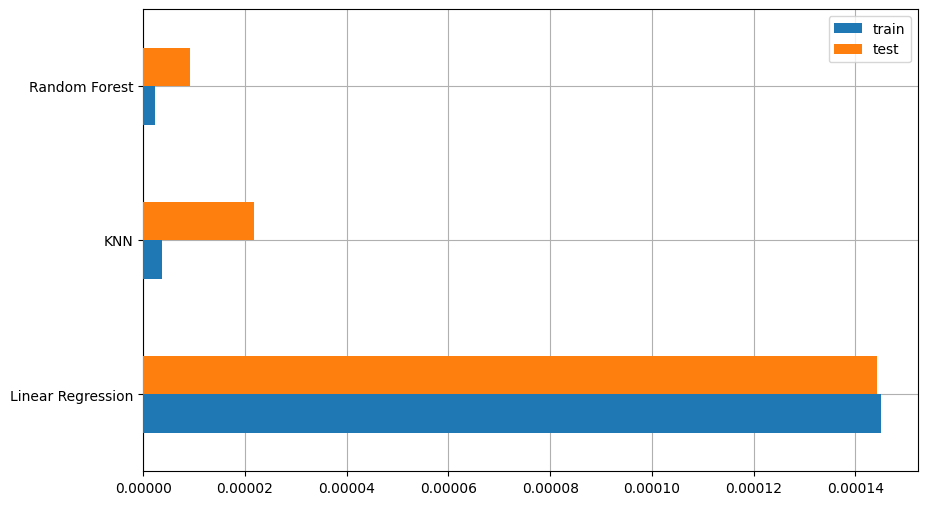

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Prediksi Model

Prediksi model dengan mengambil beberapa data testing

In [23]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).astype(float).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_Linear Regression,prediksi_Random Forest,prediksi_KNN
1926,1,0.5,0.9,1.0
1051,1,0.7,1.0,1.0
428,0,0.4,0.0,0.0
226,0,0.1,0.0,0.0
2201,0,0.3,0.0,0.0
2696,0,0.4,0.0,0.0
2270,1,0.4,1.0,1.0
31,1,0.6,0.8,1.0
976,0,0.0,0.0,0.0
1670,0,-0.0,0.0,0.0
